In [67]:
import numpy as np
import pandas as pd
import distance as ds
from ripser import ripser
import cechmate as cm
import scipy
import scipy.spatial as sp
from persim import plot_diagrams, PersImage, bottleneck, bottleneck_matching

In [2]:
points = pd.read_csv('../../yodai_data/DNAseqFISH+/DNAseqFISH+1Mbloci-E14-replicate2.csv')
order = pd.read_csv('../../yodai_data/TableS0_Mbcoords.csv')

In [3]:
points = points.merge(order, left_on='geneID', right_on='Name', how='left')

points.head()

Unnamed: 0  fov  cellID  channel    geneID         x        y      z  \
0           0    0       1        1   chr1-#1  1540.779  609.259  8.055   
1           1    0       1        1  chr1-#10  1553.183  555.433  7.375   
2           2    0       1        1  chr1-#10  1566.682  649.353  8.657   
3           3    0       1        1  chr1-#10  1527.367  615.795  8.502   
4           4    0       1        1  chr1-#10  1522.098  618.650  7.746   

   seeds  intensity  Region ID      Name  Channel Chrom     Start       End  \
0      5       1541          1   chr1-#1        1  chr1   3100000   3125000   
1      3       1553         16  chr1-#10        1  chr1  21000000  21025000   
2      4       1567         16  chr1-#10        1  chr1  21000000  21025000   
3      5       1527         16  chr1-#10        1  chr1  21000000  21025000   
4      5       1522         16  chr1-#10        1  chr1  21000000  21025000   

   Chrom ID  
0         1  
1         1  
2         1  
3         1  
4         1

In [4]:
points['x'] = (103.*points['x']).astype(int)
points['y'] = (103.*points['y']).astype(int)
points['z'] = (250.*points['z']).astype(int)

In [56]:
cell1 = points.query('fov==0 & cellID==15')
cell2 = points.query('fov==3 & cellID==20')

len(cell1), len(cell2)

(6479, 4196)

In [57]:
alpha = cm.Alpha()

cell1_alpha = alpha.build(2*cell1[['x', 'y', 'z']].values)
cell2_alpha = alpha.build(2*cell2[['x', 'y', 'z']].values)

Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.114)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 71.9)
Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.0629)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 46.9)


In [58]:
cell1_dgms = alpha.diagrams(cell1_alpha)
cell2_dgms = alpha.diagrams(cell2_alpha)

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 3.12)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.277)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 2)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.186)


In [ ]:
rips_dgms = pd.DataFrame({'fov': 0, 'cellID': 10, ''})

In [29]:
len(rips['dgms'][0])

1000

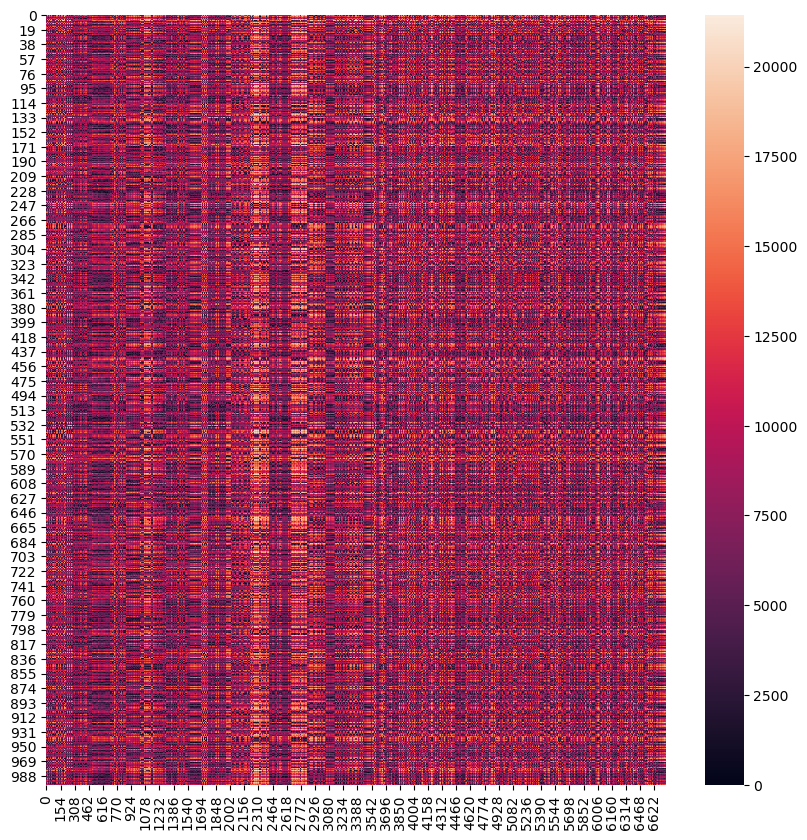

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
ax = sns.heatmap(rips['dperm2all'], square=False)

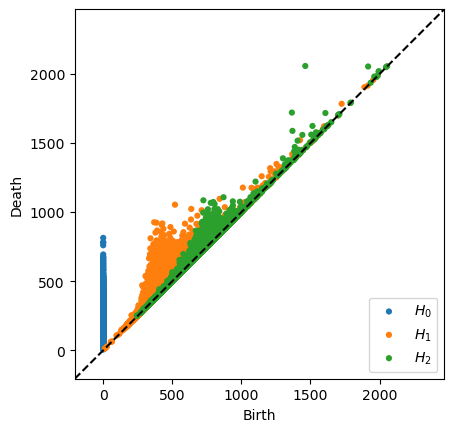

In [62]:
plot_diagrams(cell1_dgms, show=True)

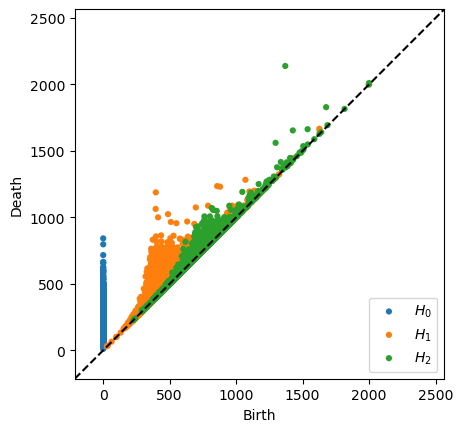

In [63]:
plot_diagrams(cell2_dgms, show=True)

In [66]:
matching = bottleneck(cell1_dgms, cell2_dgms, ma)

TypeError: bottleneck_matching() missing 2 required positional arguments: 'matchidx' and 'D'

# IF Data

In [2]:
if_points = pd.read_hdf('../../IF_converted/Rep3-1/IF_Rep2_Pos0_Cell15_wide.hd5')

if_points.head()

zIdx  xIdx  yIdx  LINE1  Telomere  MinSat  mH2A1  H3pSer10  H3K9ac  \
0     1  1394  1799    535         0       0    544       436     512   
1     1  1394  1800    506         0       0    535       422     517   
2     1  1394  1801    504         0       0    561       436     552   
3     1  1394  1802    496         0       0    558       444     516   
4     1  1394  1803    519         0       0    518       432     524   

   H3K9me2  ...  H3K27ac  H4K20me1  SINEB1  H3K27me2  SF3a66  H3K27me3  \
0      629  ...      566       436     459       393     219       489   
1      658  ...      539       459     446       386     220       477   
2      642  ...      561       465     434       403     218       508   
3      630  ...      544       434     429       391     215       501   
4      612  ...      574       428     412       408     217       490   

   H4K20me3  Lamin B1  H4K16ac  DAPI  
0       231       319      342     0  
1       217       326      351     0  
2       234       346      352     0  
3       239       340      352     0  
4       240       338      373     0  

[5 rows x 24 columns]

In [10]:
rips = ripser(if_points.query('5<zIdx<15').values[:, 0:], metric='manhattan', n_perm=100, maxdim=3)

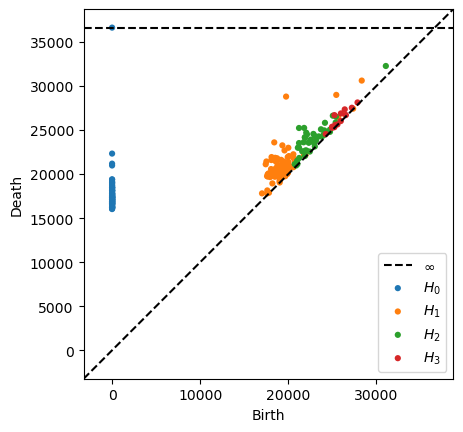

In [11]:
plot_diagrams(rips['dgms'], show=True)

In [ ]:
if_points.query('zIdx==10').values[:100, 3:]